In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, minmax_scale
from sklearn.impute import SimpleImputer
from scipy.stats import skew

Laptop Prices Dataset:

In [5]:
df = pd.read_csv("laptopData.csv")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


Info About Dataset:

In [6]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB
None
        Unnamed: 0          Price
count  1273.000000    1273.000000
mean    652.674784   59955.814073
std     376.493027   37332.251005
min       0.000000    9270.720000
25%  

Missing Data Visualization:

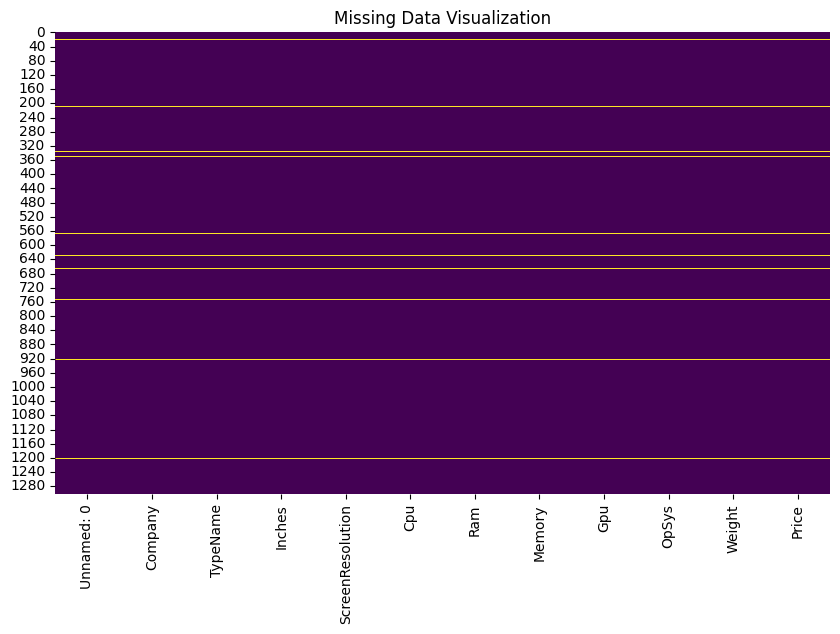

In [7]:
plt.figure(figsize=(10, 6))
sb.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

The Sum of Null Values Before Handling Missing Data:

In [8]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


Handling Missing Data:

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

imputer_num = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

The Sum of Null Values After Handling Missing Data:

In [10]:
print("Missing values after handling:")
print(pd.DataFrame(df, columns=numeric_cols.tolist() + categorical_cols.tolist()).isnull().sum())

Missing values after handling:
Unnamed: 0          0
Price               0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
dtype: int64


Feature Extraction (Selection and Renaming of Features):

In [11]:
features = ['Company', 'TypeName', 'Inches', 'Ram', 'Cpu', 'Memory', 'Price']
df = pd.DataFrame(df, columns=features)
df.rename(columns={'Inches': 'ScreenSize'}, inplace=True)

Conversion of Memory to MB:

In [15]:
def convert_memory(memory):
    try:
        if 'TB' in memory:
            memory = memory.split('TB')[0].strip()
            return pd.to_numeric(memory) * 1024
        elif 'GB' in memory:
            memory = memory.split('GB')[0].strip()
            return pd.to_numeric(memory)
        return np.nan
    except ValueError:
        return np.nan  # Return NaN for cases that cannot be converted
    df['Memory'] = df['Memory'].apply(convert_memory)

Cleaning of the RAM Column:

In [16]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(float)

Extraction and Cleaning of CPU Speed Column:

In [17]:
df['Cpu_Speed'] = df['Cpu'].str.extract(r'(\d+\.\d+)GHz').astype(float)

Detection and Outliers Handling Using the IQR Method:

In [30]:
# Ensure all necessary columns are numeric
df['ScreenSize'] = pd.to_numeric(df['ScreenSize'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Detect and handle outliers using the IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in ['ScreenSize', 'Ram', 'Memory', 'Price', 'Cpu_Speed']:
    df = handle_outliers(df, col)

Skewed Data Normalization:

In [31]:
for col in ['ScreenSize', 'Ram', 'Memory', 'Price', 'Cpu_Speed']:
    if skew(df[col]) > 1:
        df[col] = np.log1p(df[col])

Scaling of Numeric Data Using MinMaxScaler:

In [32]:
scaler = MinMaxScaler()
df[['ScreenSize', 'Ram', 'Memory', 'Price', 'Cpu_Speed']] = scaler.fit_transform(df[['ScreenSize', 'Ram', 'Memory', 'Price', 'Cpu_Speed']])

Label Encoding of Categorical Data:

In [33]:
label_encoder = LabelEncoder()
for col in ['Company', 'TypeName', 'Cpu']:
    df[col] = label_encoder.fit_transform(df[col])

Cleaned Dataset:

In [34]:
print(df.head())

   Company  TypeName  ScreenSize       Ram  Cpu    Memory     Price  Cpu_Speed
0        1         4    0.245283  0.636364   49  0.111111  0.589835   0.636364
1        1         4    0.245283  0.636364   47  0.111111  0.362527   0.409091
2        7         3    0.679245  0.636364   58  0.238095  0.195462   0.727273
4        1         4    0.245283  0.636364   51  0.238095  0.829087   1.000000
7        1         4    0.245283  0.636364   47  0.238095  0.496493   0.409091


Correlation Matrix Visuallization:

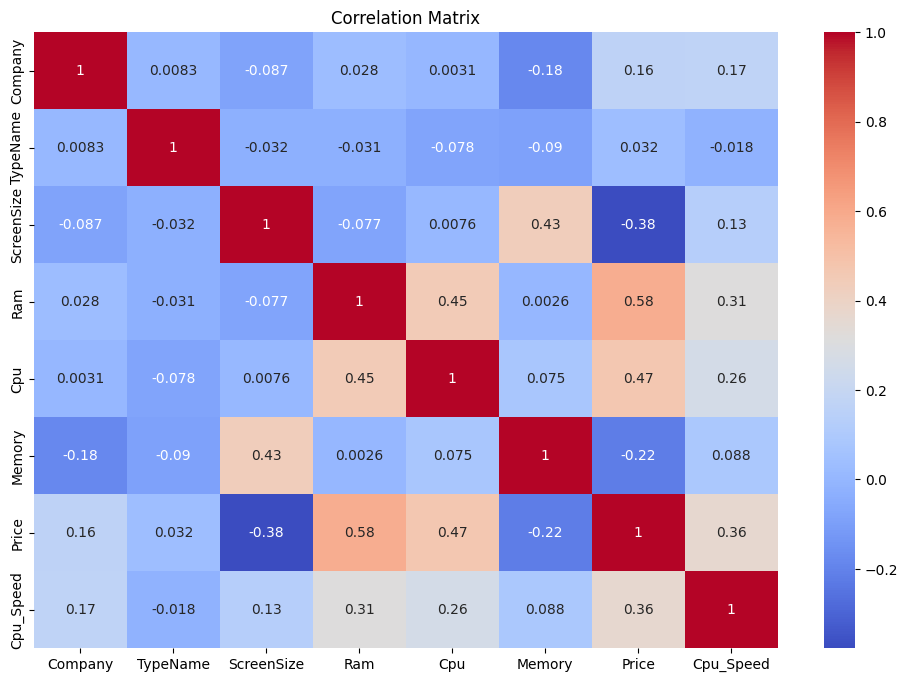

In [35]:
corr = df.corr()
plt.figure(figsize=(12, 8))
dataplot = sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Distribution of Features:

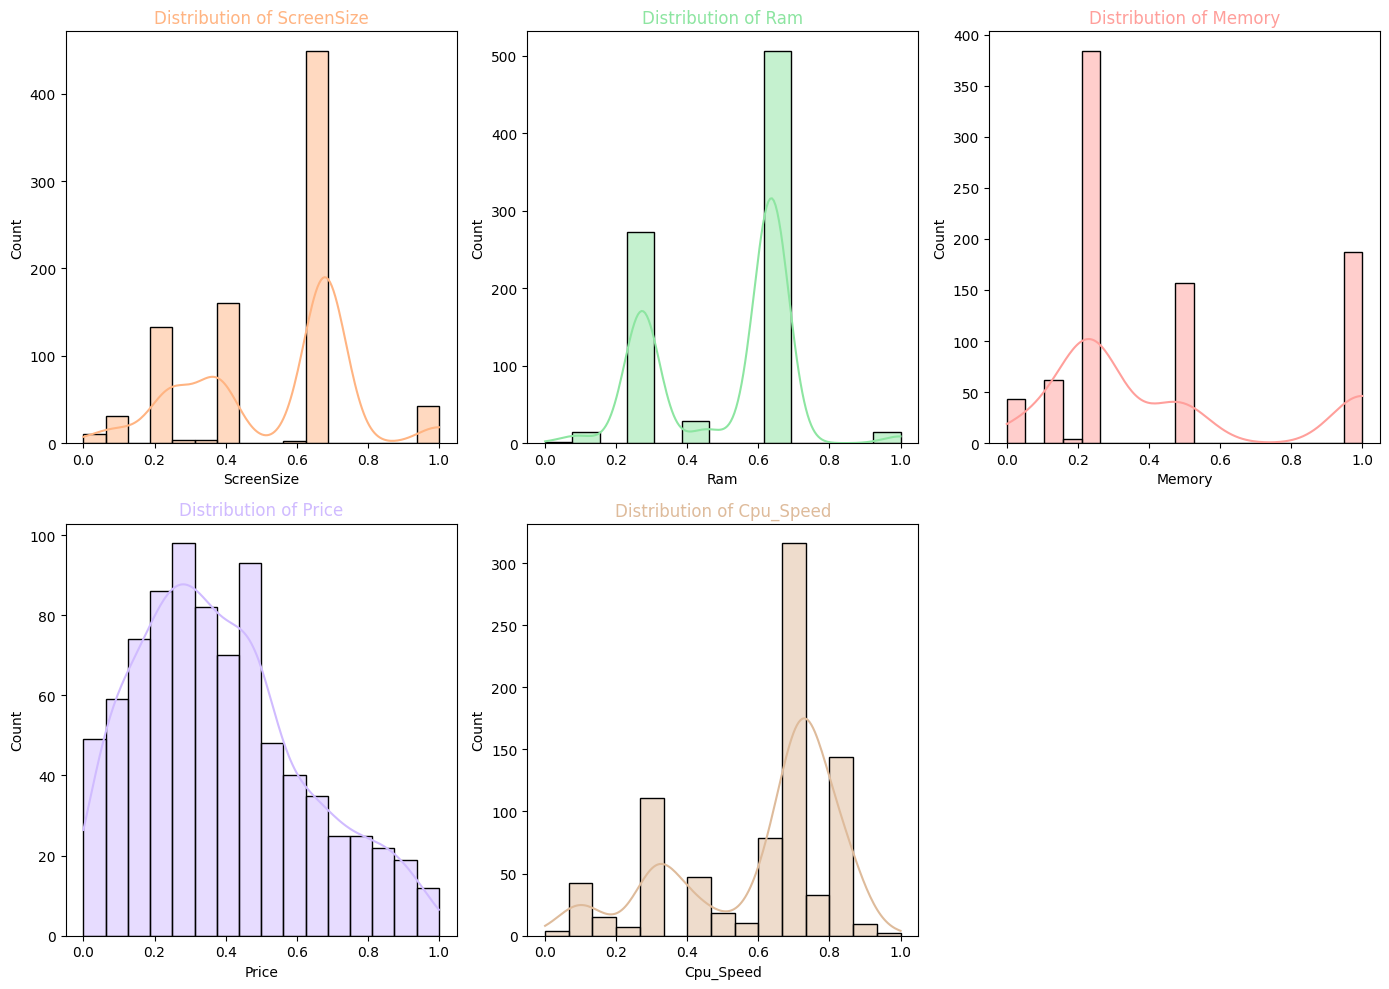

In [40]:
colors = sb.color_palette('pastel')
plt.figure(figsize=(14, 10))
for i, col in enumerate(['ScreenSize', 'Ram', 'Memory', 'Price', 'Cpu_Speed'], 1):
    plt.subplot(2, 3, i)
    sb.histplot(df[col], kde=True, color=colors[i % len(colors)])
    plt.title(f'Distribution of {col}', color=colors[i % len(colors)])
plt.tight_layout()
plt.show()

Numeric Features:

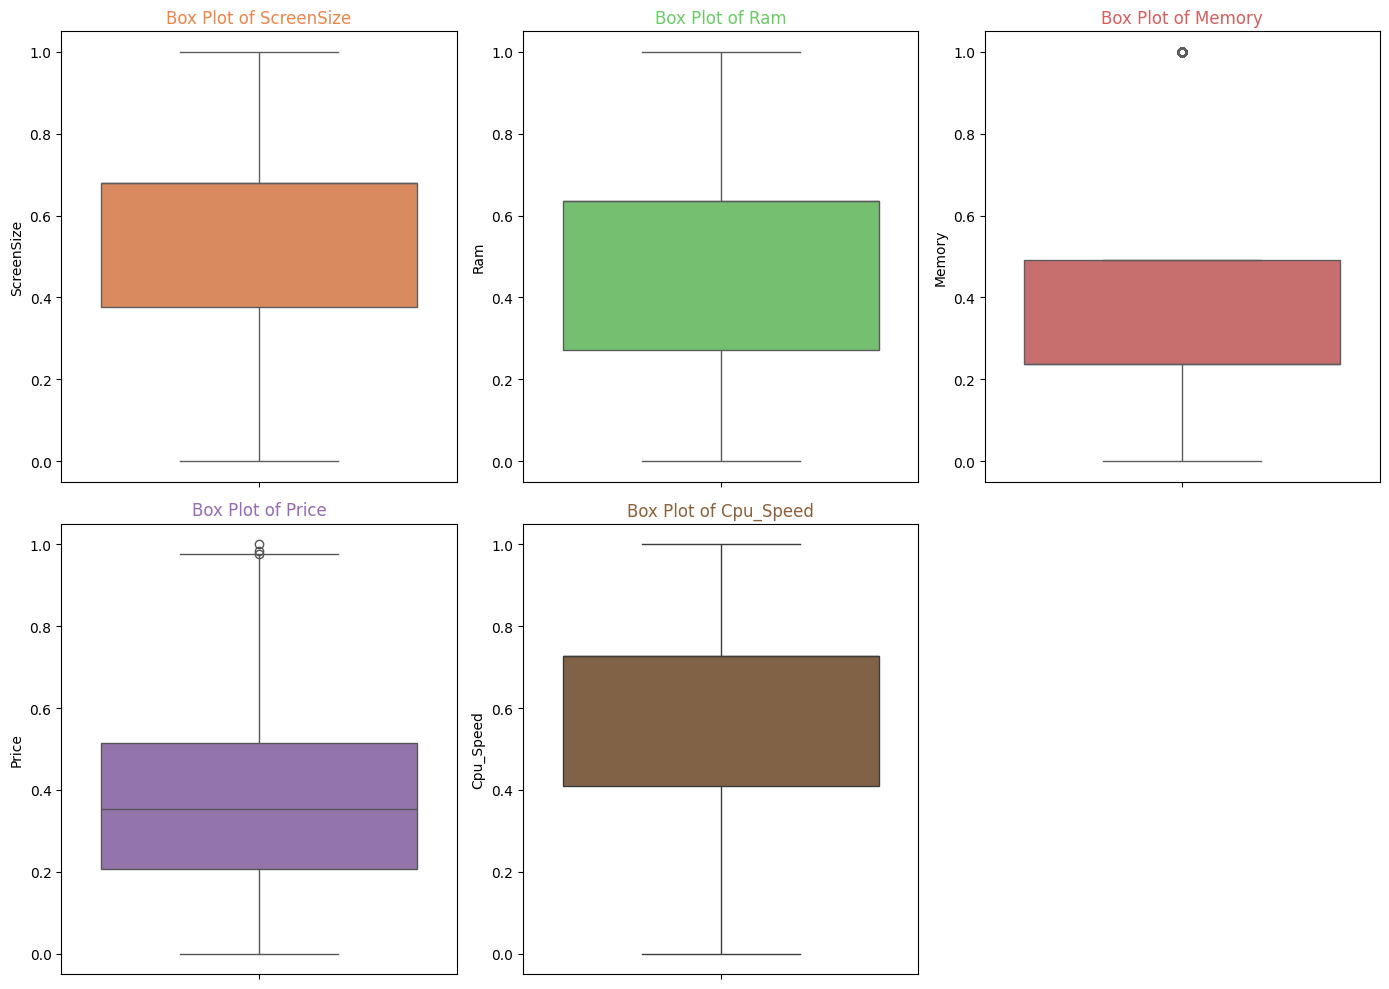

In [41]:
colors = sb.color_palette('muted')
plt.figure(figsize=(14, 10))
for i, col in enumerate(['ScreenSize', 'Ram', 'Memory', 'Price', 'Cpu_Speed'], 1):
    plt.subplot(2, 3, i)
    sb.boxplot(y=df[col], color=colors[i % len(colors)])
    plt.title(f'Box Plot of {col}', color=colors[i % len(colors)])
plt.tight_layout()
plt.show()

Categorical Features:

C:\Users\71548\AppData\Local\Temp\ipykernel_20332\51175965.py:5: UserWarning: 
The palette list has fewer values (10) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sb.countplot(y=df[col], hue=df[col], palette=colors, legend=False)
C:\Users\71548\AppData\Local\Temp\ipykernel_20332\51175965.py:5: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sb.countplot(y=df[col], hue=df[col], palette=colors, legend=False)
C:\Users\71548\AppData\Local\Temp\ipykernel_20332\51175965.py:5: UserWarning: 
The palette list has fewer values (10) than needed (87) and will cycle, which may produce an uninterpretable plot.
  sb.countplot(y=df[col], hue=df[col], palette=colors, legend=False)


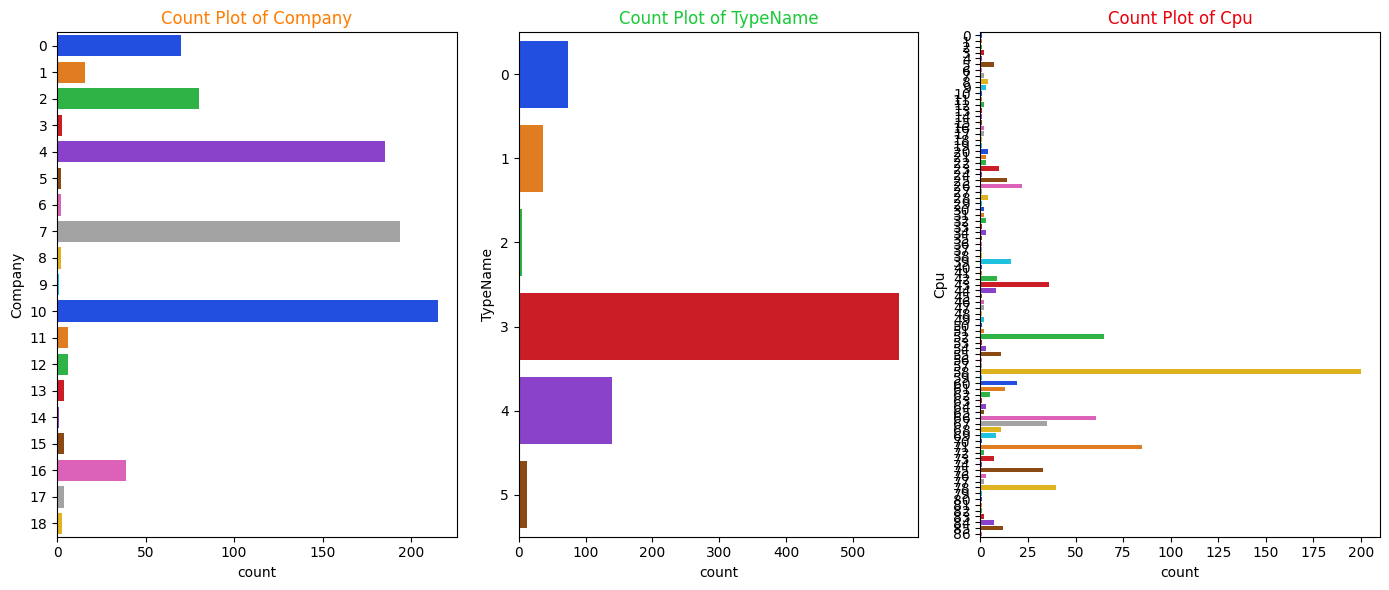

In [44]:
colors = sb.color_palette('bright')
plt.figure(figsize=(14, 6))
for i, col in enumerate(['Company', 'TypeName', 'Cpu'], 1):
    plt.subplot(1, 3, i)
    sb.countplot(y=df[col], hue=df[col], palette=colors, legend=False)
    plt.title(f'Count Plot of {col}', color=colors[i % len(colors)])
plt.tight_layout()
plt.show()

Relationships Between Features:

<Figure size 1200x800 with 0 Axes>

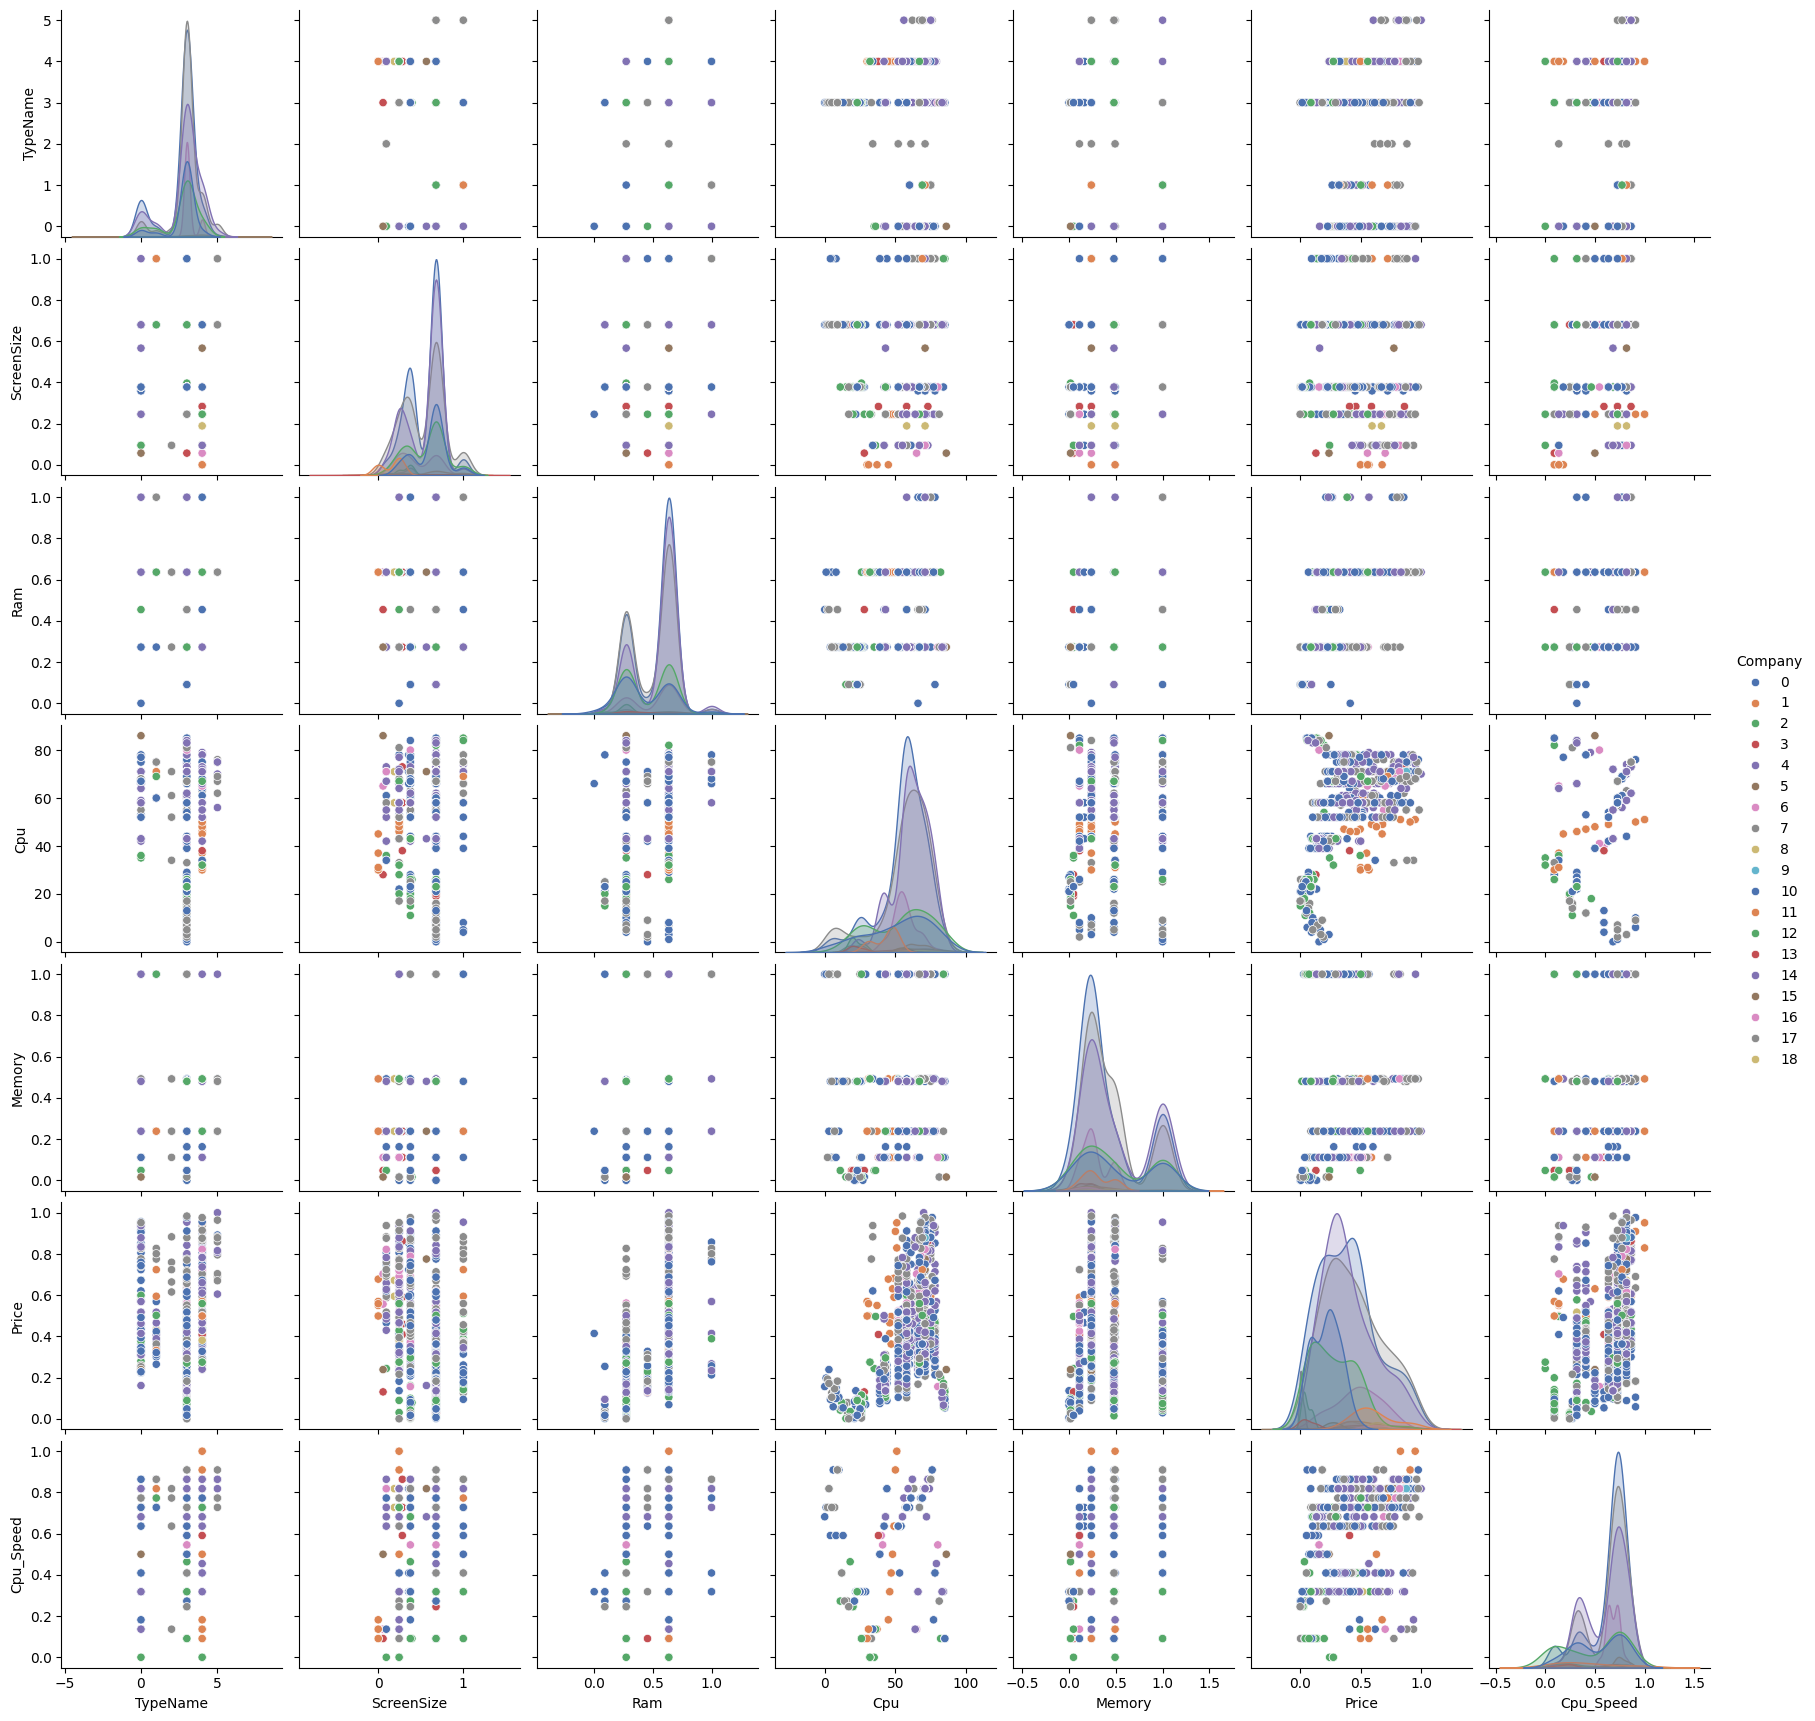

In [45]:
plt.figure(figsize=(12, 8))
sb.pairplot(df, hue='Company', palette='deep')
plt.show()